## [Open original folder](https://drive.google.com/drive/folders/1ODYdaX71Q0lzWmBdwrm7wxmOHsjDbWb1?usp=sharing) ##

## Object Recognition using Faster R-CNN ##

Caution: modify the path ```/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection``` in the lines of code of this file, according to your path in Drive. Eg: if the location of your folder is in the default path of your drive, then modify the last path to: ```/content/drive/My Drive/Lab4-Detection```

### Preparing Libraries ###

In [1]:
# first Runtime > Factory Reset Runtime
# then click on Reconect, wait until reconection finish
# then run this block
# then Runtime > Restart Runtime, wait until reconection finish
# then run agin this block

!pip install tensorflow-gpu==1.15
!pip install keras==2.1.5
!pip install h5py
!pip install numpy
!pip install opencv-python
!pip install sklearn

In [2]:
import tensorflow
import keras
tensorflow.test.gpu_device_name()

# if the GPU works OK, it should print something like:
# /device:GPU:0

Using TensorFlow backend.


'/device:GPU:0'

In [3]:
print(tensorflow.__version__)
print(keras.__version__)

# should print something like:
# 1.15.2
# 2.1.5

1.15.0
2.1.5


### Connecting to Drive ###

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import sys
import os

# before this, connect to google drive: lateral bar Files -> click on Mound Drive icon

py_file_location = "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection"
sys.path.append(os.path.abspath(py_file_location))


### Load Dataset ###

In [6]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=1TVx7005znK0QgK-prd5maH5BJmHpf2Wq' \
    -O /tmp/dataset-blood-cells.zip


will be placed in the single file you specified.

--2020-08-24 08:51:53--  https://docs.google.com/uc?export=download&id=1TVx7005znK0QgK-prd5maH5BJmHpf2Wq
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ancqmelugm1p349quitgdscp05171dvs/1598259075000/02133894314206366517/*/1TVx7005znK0QgK-prd5maH5BJmHpf2Wq?e=download [following]
--2020-08-24 08:51:54--  https://doc-0o-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ancqmelugm1p349quitgdscp05171dvs/1598259075000/02133894314206366517/*/1TVx7005znK0QgK-prd5maH5BJmHpf2Wq?e=download
Resolving doc-0o-5g-docs.googleusercontent.com (doc-0o-5g-docs.googleusercontent.com)... 74.125.28.132, 2607:f8b0:400e:c04::84
Connecting to 

In [7]:
import os
import zipfile

local_zip = '/tmp/dataset-blood-cells.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Train ###

If you want to use with your own dataset, modify the train_images.txt file according your drive path. Eg:
```
...
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,68,315,286,480,WBC
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,346,361,446,454,RBC
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,53,179,146,299,RBC
/tmp/dataset-blood-cells/train_images/BloodImage_00001.jpg,449,400,536,480,RBC
...
```


In [8]:
!python "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/train_frcnn.py" -h

Using TensorFlow backend.
Usage: train_frcnn.py [options]

Options:
  -h, --help            show this help message and exit
  -p TRAIN_PATH, --path=TRAIN_PATH
                        Path to training data.
  -o PARSER, --parser=PARSER
                        Parser to use. One of simple or pascal_voc
  -n NUM_ROIS, --num_rois=NUM_ROIS
                        Number of RoIs to process at once.
  --network=NETWORK     Base network to use. Supports vgg or resnet50.
  --hf                  Augment with horizontal flips in training.
                        (Default=false).
  --vf                  Augment with vertical flips in training.
                        (Default=false).
  --rot, --rot_90       Augment with 90 degree rotations in training.
                        (Default=false).
  --num_epochs=NUM_EPOCHS
                        Number of epochs.
  --config_filename=CONFIG_FILENAME
                        Location to store all the metadata related to the
                        traini

In [9]:
# see the details in the train_frcnn.py file
# default 2000 num_epochs but we use only 2 num_epochs

!python "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/train_frcnn.py" \
    -o simple \
    -p "/tmp/dataset-blood-cells/train_images.txt" \
    --num_epochs 2 \
    --config_filename "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/config.pickle" \
    --output_weight_path "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/model_frcnn.hdf5"

Using TensorFlow backend.
Parsing annotation files
Training images per class:
{'Platelets': 209, 'RBC': 2382, 'WBC': 214, 'bg': 0}
Num classes (including bg) = 4
Config has been written to /content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/config.pickle, and can be loaded when testing to ensure correct results
Num train samples 168
Num val samples 37







loading weights from resnet50_weights_tf_dim_ordering_tf_kernels.h5
Could not load pretrained model weights. Weights can be found in the keras application folder 		https://github.com/fchollet/keras/tree/master/keras/applications


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Starting training
Epoch 1/2





2020-08-24 08:52:07.712412: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-24 08:52:07.716923: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] 

### Test ###

In [10]:
!python "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/test_frcnn.py" -h

Using TensorFlow backend.
Usage: test_frcnn.py [options]

Options:
  -h, --help            show this help message and exit
  -p TEST_PATH, --path=TEST_PATH
                        Path to test data.
  -n NUM_ROIS, --num_rois=NUM_ROIS
                        Number of ROIs per iteration. Higher means more memory
                        use.
  --config_filename=CONFIG_FILENAME
                        Location to read the metadata related to the training
                        (generated when training).
  --network=NETWORK     Base network to use. Supports vgg or resnet50.
  --weights=WEIGTHS_FILE
                        Select the path and location of .hdf5 file.
  --output=OUTPUT_FOLDER
                        Select the output folder.


In [11]:
# see the details in the test_frcnn.py file

!python "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/test_frcnn.py" \
    -p "/tmp/dataset-blood-cells/test_images/" \
    --config_filename "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/config.pickle" \
    --weights "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/model_frcnn.hdf5" \
    --output "/tmp/dataset-blood-cells/test_images_result/"

Using TensorFlow backend.
{0: 'WBC', 1: 'RBC', 2: 'Platelets', 3: 'bg'}







Loading weights from /content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab4-Detection/model_frcnn.hdf5



2020-08-24 09:33:55.026802: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-24 09:33:55.031384: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-08-24 09:33:55.031582: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xa65c1c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-24 09:33:55.031612: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-08-24 09:33:55.033450: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-24 09:33:55.127972: I tensorflow/stream_executor/cud

### Visualization ###

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(-0.5, 639.5, 479.5, -0.5)

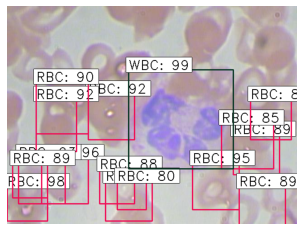

In [13]:
img=mpimg.imread("/tmp/dataset-blood-cells/test_images_result/0.png")
plt.imshow(img, cmap = 'gray')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

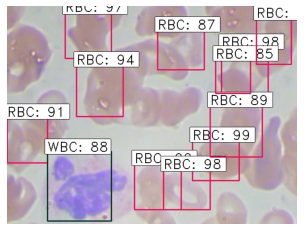

In [14]:
img=mpimg.imread("/tmp/dataset-blood-cells/test_images_result/1.png")
plt.imshow(img, cmap = 'gray')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

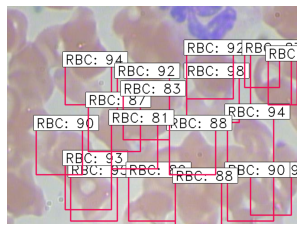

In [15]:
img=mpimg.imread("/tmp/dataset-blood-cells/test_images_result/2.png")
plt.imshow(img, cmap = 'gray')
plt.axis('off')